## GBM Interactive Plot

In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2

<AxesSubplot:>

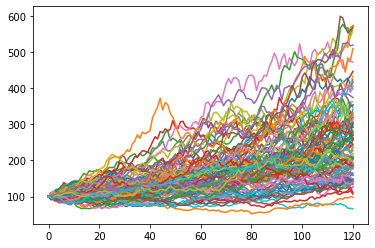

In [2]:
erk.gbm(10,100,mu=0.1).plot(legend=False)

In [3]:
def show_gbm(n_scenarios,mu,sigma):
    s_0=100
    prices=erk.gbm(n_scenarios=n_scenarios,mu=mu,sigma=sigma,s_0=s_0)
    ax=prices.plot(legend=False,color='indianred',alpha=0.5,linewidth=2,figsize=(12,5))
    ax.axhline(y=s_0,ls=':',color='black')
    ax.set_ylim(top=400)
    # draw a dot at the origin, aplha is the transparency f=of the line
    ax.plot(0,s_0,marker='o',color='darkred',alpha=0.2)

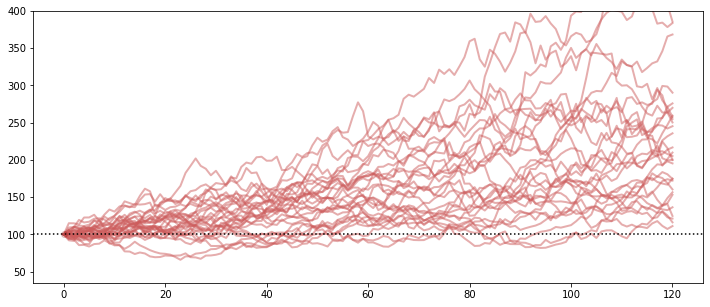

In [4]:
show_gbm(30,0.07,0.15)

In [5]:
gbm_controls=widgets.interactive(show_gbm,
                                 n_scenarios=(1,20,5),
                                 mu=(-0.2,0.2,0.01),
                                 sigma=(0,0.3,0.01)
                                )

In [6]:
display(gbm_controls)

interactive(children=(IntSlider(value=6, description='n_scenarios', max=20, min=1, step=5), FloatSlider(value=…

## Interactive CPPI simulation - Monte Carlo

In [7]:
def show_cppi(n_scenarios=50,mu=0.07,sigma=0.15,m=3,floor=0,riskfree_rate=0.03,y_max=100):
    start=100
    sim_rets=erk.gbm(n_scenarios=n_scenarios,mu=mu,sigma=sigma,prices=False,steps_per_year=12)
    risky_r=pd.DataFrame(sim_rets)
    # run the backtest
    btr=erk.run_cppi(risky_r=pd.DataFrame(sim_rets),riskfree_rate=riskfree_rate,m=m,start=start,floor=floor)
    wealth=btr['Wealth']
    y_max=wealth.values.max()*y_max/100
    ax=wealth.plot(legend=False,alpha=0.3,color='indianred',figsize=(12,6))
    ax.axhline(y=start,ls=':',color='black')
    ax.axhline(y=start*floor,ls='--',color='red')
    ax.set_ylim(top=y_max)
cppi_controls=widgets.interactive(show_cppi,
                                  n_scenarios=widgets.IntSlider(min=1,max=1000,step=5,value=50),
                                  mu=(0,0.2,0.01),
                                  sigma=(0,0.3,0.05),
                                  floor=(0,2,0.1),
                                  m=(1,5,0.5),
                                  riskfree_rate=(0,0.05,0.01),
                                  y_max=widgets.IntSlider(min=0,max=100,step=1,value=100,description='zoom y axis'))
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…